In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns;sns.set_theme(font_scale=1.5)

from sklearn.cluster import KMeans



In [2]:
spot_df = pd.read_csv("db_spotify/data.csv")

Seleccionamos las features que usaremos


In [15]:
clustering_data = spot_df[['acousticness','danceability','energy','explicit','instrumentalness','liveness','speechiness','valence']]



Para determinar el número de clusters, usamos el método del codo:


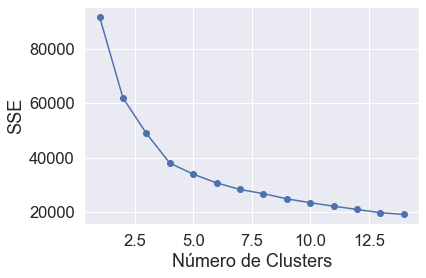

In [4]:
SSE = []
numClusters = list(range(1, 15))
for k in numClusters:
    k_means = KMeans(n_clusters=k, random_state=1)
    k_means.fit(clustering_data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE, marker="o")
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.show()

Observando el gráfico, vemos que 4 parece ser un buen punto de partida.

In [16]:

kmeans = KMeans(n_clusters=4).fit(clustering_data) 


labels = pd.DataFrame(kmeans.labels_) 

labeled_data = pd.concat((clustering_data,labels),axis=1)
labeled_data = labeled_data.rename({0:'labels'},axis=1)
labeled_data

,acousticness,danceability,energy,explicit,instrumentalness,liveness,speechiness,valence,labels
0,0.9950,0.708,0.1950,0,0.563000,0.1510,0.0506,0.7790,1
1,0.9940,0.379,0.0135,0,0.901000,0.0763,0.0462,0.0767,1
2,0.6040,0.749,0.2200,0,0.000000,0.1190,0.9290,0.8800,2
3,0.9950,0.781,0.1300,0,0.887000,0.1110,0.0926,0.7200,1
4,0.9900,0.210,0.2040,0,0.908000,0.0980,0.0424,0.0693,1
...,...,...,...,...,...,...,...,...,...
169904,0.1730,0.875,0.4430,1,0.000032,0.0891,0.1430,0.3060,3
169905,0.0167,0.719,0.3850,0,0.031300,0.1110,0.0403,0.2700,0
169906,0.5380,0.514,0.5390,0,0.002330,0.1080,0.1050,0.1530,2
169907,0.0714,0.646,0.7610,0,0.000000,0.2220,0.0385,0.4720,0


Hacemos un pairplot para visualizar los clusters:

/Users/isidoramancilla/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/isidoramancilla/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


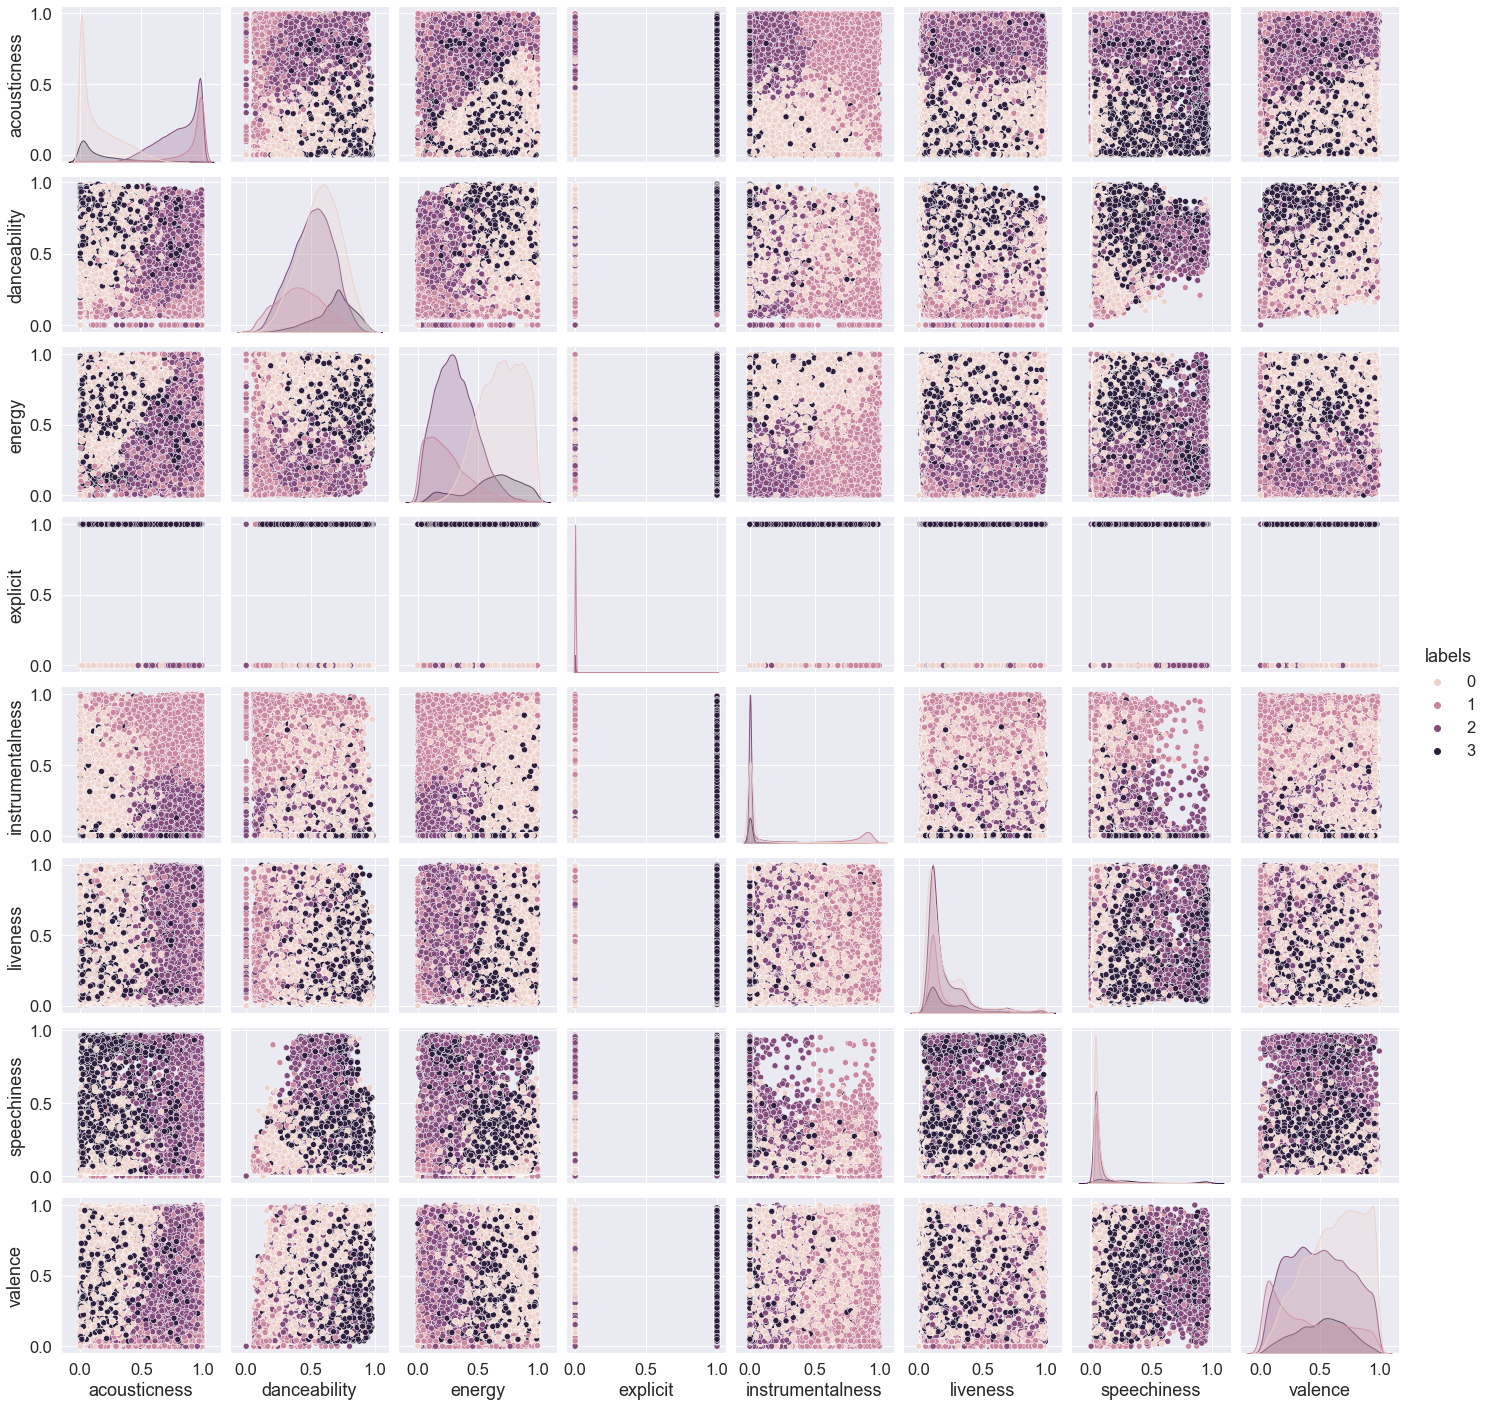

In [18]:
sns.pairplot(labeled_data,hue='labels')

graficamos individualmente algunas de las features interesantes:

<AxesSubplot:xlabel='acousticness', ylabel='instrumentalness'>

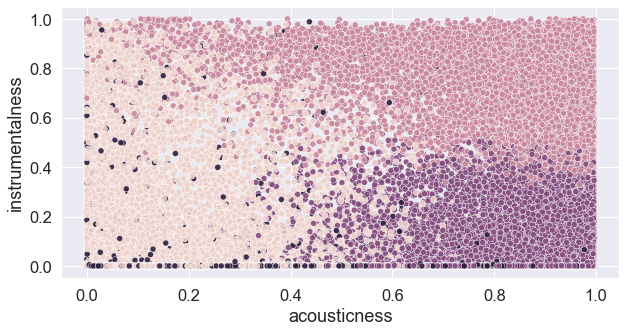

In [50]:
fig1 = plt.figure(figsize=(10,5))
sns.scatterplot(x='acousticness',y='instrumentalness', data=labeled_data,hue='labels',legend=False,alpha=0.9)

<AxesSubplot:xlabel='liveness', ylabel='valence'>

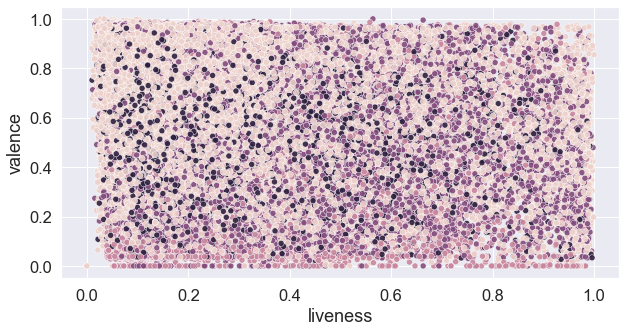

In [49]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='liveness',y='valence', data=labeled_data,hue='labels',legend=False,alpha=0.9)

<AxesSubplot:xlabel='acousticness', ylabel='Count'>

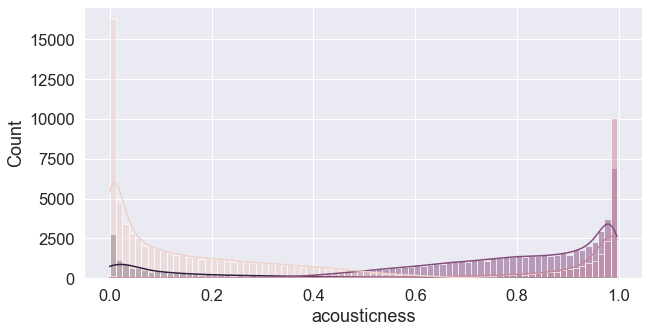

In [56]:
plt.figure(figsize=(10,5))
sns.histplot(data=labeled_data, x='acousticness',hue='labels',kde=True,legend=False,bins=80)

<AxesSubplot:xlabel='liveness', ylabel='Count'>

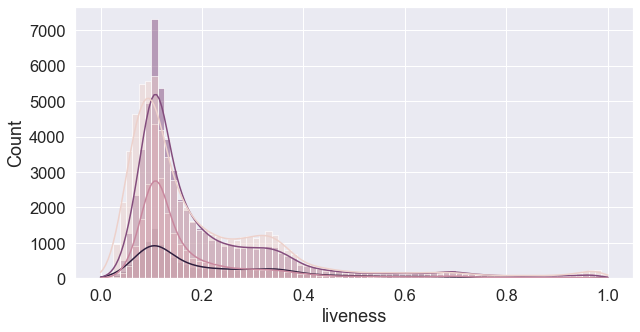

In [55]:
plt.figure(figsize=(10,5))
sns.histplot(data=labeled_data, x='liveness',hue='labels',kde=True,legend=False,bins=80)

<AxesSubplot:xlabel='energy', ylabel='Count'>

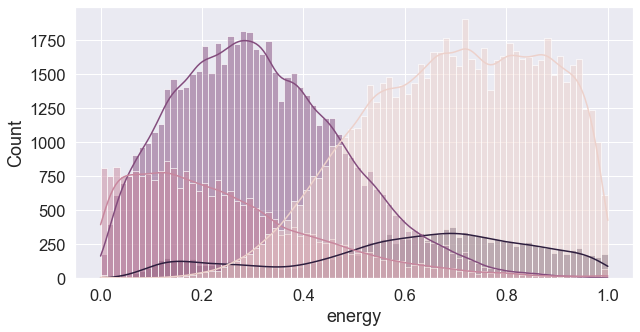

In [54]:
plt.figure(figsize=(10,5))
sns.histplot(data=labeled_data, x='energy',hue='labels',kde=True,legend=False,bins=80)